In [7]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data_file = '/Users/dhruvbalwada/work_root/sogos/data/processed/soccom_float_CO2flux_14Jan20.nc'

In [5]:
ds = xr.open_dataset(data_file)

In [49]:
ds_6hr = xr.merge([ds.Time_6hr, ds.Float_6hr, ds["Air-sea CO2 flux_6hr"], ds.Lat_6hr, ds.Lon_6hr, ds.WindSpd_6hr, ds.SeaIceConc_6hr]).isel(c=0)
ds_month = xr.merge([ds.Time_month, ds.Float_month, ds["Air-sea CO2 flux_month"], ds.Lat_month, ds.Lon_month]).isel(c=0)

In [50]:
ds_month

<xarray.Dataset>
Dimensions:                 (m: 1806)
Dimensions without coordinates: m
Data variables:
    Time_month              (m) datetime64[ns] 2016-03-15 ... 2019-06-15
    Float_month             (m) float64 507.0 507.0 ... 1.289e+04 1.289e+04
    Air-sea CO2 flux_month  (m) float64 3.595 5.186 2.866 ... -0.2278 3.298
    Lat_month               (m) float64 -62.15 -62.11 -61.97 ... -62.47 -61.77
    Lon_month               (m) float64 75.07 74.95 75.58 ... 94.34 31.31 30.46

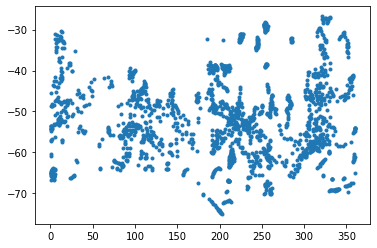

In [13]:
plt.plot(ds.Lon_month.isel(c=0), ds.Lat_month.isel(c=0),'.')

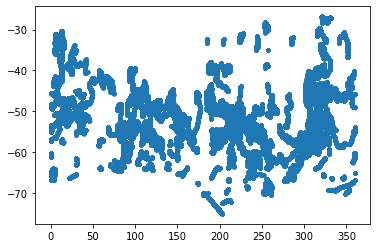

In [14]:
plt.plot(ds.Lon_6hr.isel(c=0), ds.Lat_6hr.isel(c=0),'.')

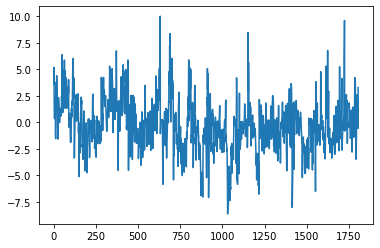

In [15]:
plt.plot(ds["Air-sea CO2 flux_month"].isel(c=0))

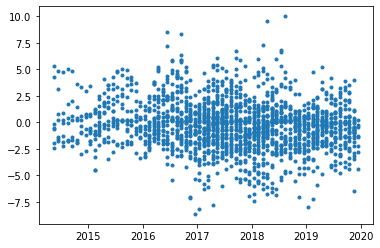

In [18]:
plt.plot(ds["Time_month"].isel(c=0), ds["Air-sea CO2 flux_month"].isel(c=0),'.')

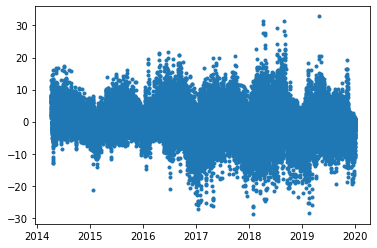

In [19]:
plt.plot(ds["Time_6hr"].isel(c=0), ds["Air-sea CO2 flux_6hr"].isel(c=0),'.')

In [45]:
ds.Time_month.dt.month.isel(c=0) == 1

<xarray.DataArray 'month' (m: 1806)>
array([False, False, False, ..., False, False, False])
Dimensions without coordinates: m

In [46]:
(ds["Air-sea CO2 flux_month"].isel(c=0)).where(ds.Time_month.dt.month.isel(c=0) == 1, drop=True)

<xarray.DataArray 'Air-sea CO2 flux_month' (m: 125)>
array([-1.02663539, -1.56961698,  0.95744967,  1.51880969,  1.33504039,
        1.33829411, -0.3838993 ,  2.93054632, -2.45033223,  0.12603845,
       -1.07730683, -2.15567406,  0.53603116, -0.05484833, -3.31438908,
       -0.19961573, -1.16473637, -1.72181398, -2.0034826 , -2.00890838,
       -0.75643036,  1.52971623, -0.83792925,  0.70868639,  3.40772772,
       -0.95446806,  0.27151569,  1.00838186, -0.83005098,  0.63856384,
        1.17375258,  0.80865185, -0.33636812, -3.24981508, -3.49878904,
       -1.16355722, -0.55533007, -0.64219   ,  0.1427145 , -0.47629092,
        0.59604479,  0.36462686,  1.36229823,  1.21760592,  0.88732227,
        4.32650029, -5.43112403, -1.78862356, -2.9251432 ,  0.62341485,
        2.40533412, -0.8420888 , -2.76180917, -0.3006468 , -3.69695224,
       -4.19321331, -3.42757597,  1.76678744, -1.41893363, -3.29030875,
       -1.06004242, -3.47559369, -6.76094034, -0.87910809, -5.22013056,
       -2.1

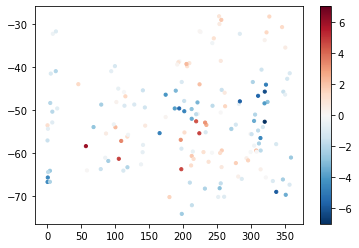

In [54]:
month = 2;
ds_sel = ds_month.where(ds_month.Time_month.dt.month == month, drop=True)

plt.scatter(ds_sel.Lon_month, ds_sel.Lat_month, s=10, c=ds_sel["Air-sea CO2 flux_month"], cmap='RdBu_r', vmin=-7, vmax=7)
plt.colorbar()

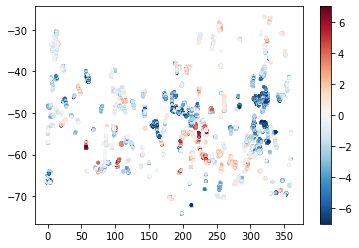

In [60]:
month = [1,2,3];
ds_sel = ds_6hr.where(ds_6hr.Time_6hr.dt.season == "DJF", drop=True)

plt.scatter(ds_sel.Lon_6hr, ds_sel.Lat_6hr, s=5, c=ds_sel["Air-sea CO2 flux_6hr"], cmap='RdBu_r', vmin=-7, vmax=7)
plt.colorbar()

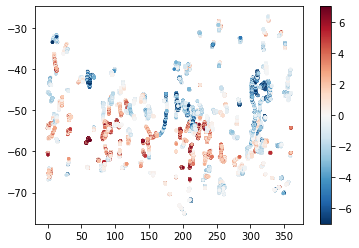

In [61]:
month = [1,2,3];
ds_sel = ds_6hr.where(ds_6hr.Time_6hr.dt.season == "MAM", drop=True)

plt.scatter(ds_sel.Lon_6hr, ds_sel.Lat_6hr, s=5, c=ds_sel["Air-sea CO2 flux_6hr"], cmap='RdBu_r', vmin=-7, vmax=7)
plt.colorbar()

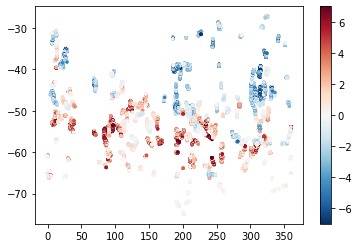

In [62]:
month = [1,2,3];
ds_sel = ds_6hr.where(ds_6hr.Time_6hr.dt.season == "JJA", drop=True)

plt.scatter(ds_sel.Lon_6hr, ds_sel.Lat_6hr, s=5, c=ds_sel["Air-sea CO2 flux_6hr"], cmap='RdBu_r', vmin=-7, vmax=7)
plt.colorbar()

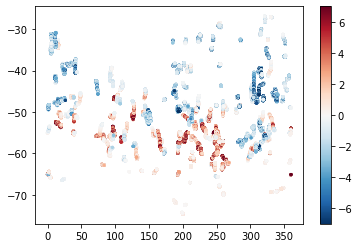

In [63]:
month = [1,2,3];
ds_sel = ds_6hr.where(ds_6hr.Time_6hr.dt.season == "SON", drop=True)

plt.scatter(ds_sel.Lon_6hr, ds_sel.Lat_6hr, s=5, c=ds_sel["Air-sea CO2 flux_6hr"], cmap='RdBu_r', vmin=-7, vmax=7)
plt.colorbar()

In [34]:
ds_monthly = ds.groupby(ds.Time_month.dt.month).mean()

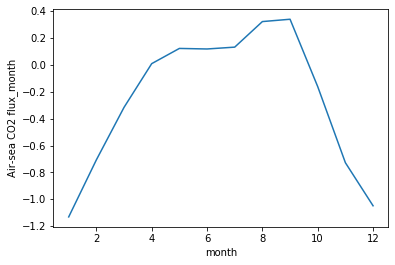

In [40]:
ds_monthly["Air-sea CO2 flux_month"].plot()

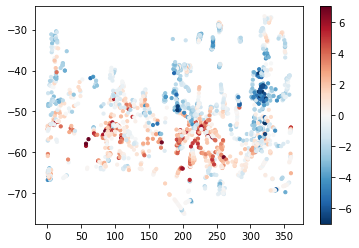

In [26]:
plt.scatter(ds_month.Lon_month, ds.Lat_month, s=10, c=ds["Air-sea CO2 flux_month"], cmap='RdBu_r', vmin=-7, vmax=7)
plt.colorbar()

In [ ]:
plt.scatter(ds.Lon_month, ds.Lat_month, s=10, c=ds["Air-sea CO2 flux_month"], cmap='RdBu_r', vmin=-7, vmax=7)
plt.colorbar()

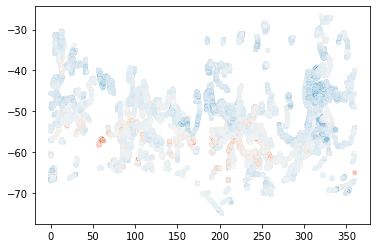

In [24]:
plt.scatter(ds.Lon_6hr, ds.Lat_6hr, s=10, c=ds["Air-sea CO2 flux_6hr"], cmap='RdBu_r')